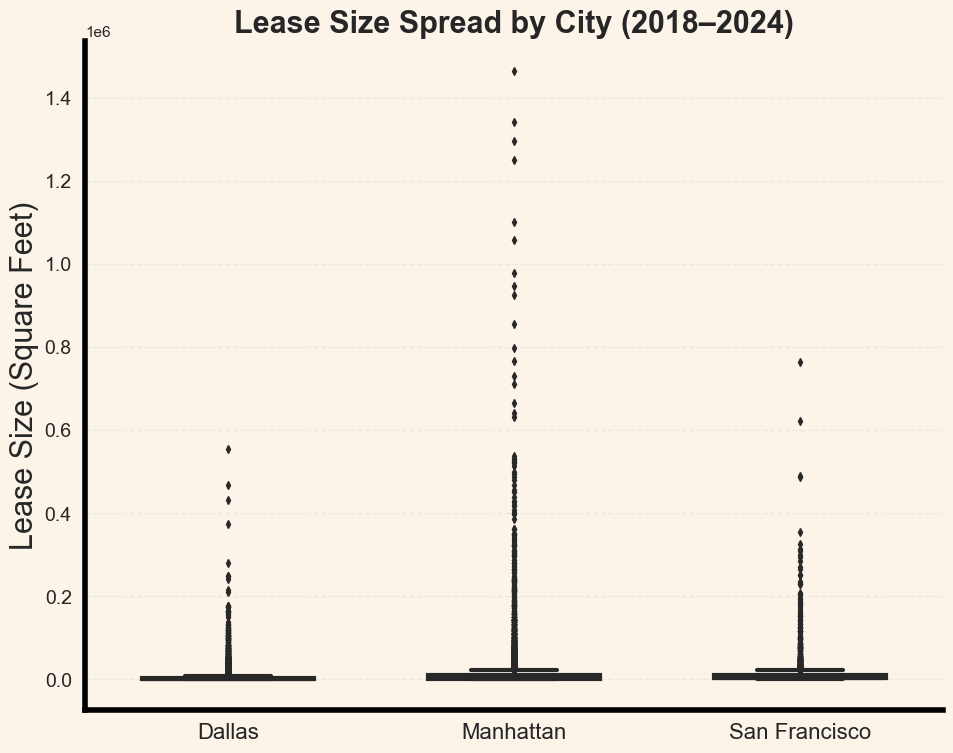

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Load leases data
leases = pd.read_csv("/Users/aryan/Desktop/Desktop/Datafest/DartMonkeyDataFest/data/Leases.csv")

# Filter leases
leases_filtered = leases[
    leases['market'].str.contains("Dallas|Manhattan|San Francisco", case=False, na=False)
].copy()

leases_filtered['city'] = leases_filtered['market'].str.extract(r'(Dallas|Manhattan|San Francisco)', expand=False)
leases_filtered['year'] = leases_filtered['year'].astype(int)

# Set theme
sns.set_theme(style="white", rc={
    "axes.edgecolor": "black",
    "axes.linewidth": 4.0,
    "grid.color": "0.85",
    "axes.facecolor": "#fcf4e8",
    "figure.facecolor": "#fcf4e8"
})

colors = {
    "Dallas": "#654321",
    "Manhattan": "#e07b91",
    "San Francisco": "#88b04b"
}

# --- Population data ---
population_data = pd.DataFrame({
    'year': [2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017],
    'Dallas': [6732000, 6655000, 6574000, 6488000, 6397000, 6301000, 6201000, 6099000, 5971000],
    'Manhattan': [19154000, 19034000, 18937000, 18867000, 18823000, 18804000, 18805000, 18819000, 18762000],
    'San Francisco': [3363000, 3343000, 3328000, 3318000, 3313000, 3314000, 3318000, 3325000, 3320000]
})
pop_melted = population_data.melt(id_vars='year', var_name='city', value_name='population')

# --- 1. Boxplot of Lease Sizes ---
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=leases_filtered, x='city', y='leasedSF', palette=colors, width=0.6, linewidth=3, fliersize=4, ax=ax)
ax.set_xlabel("")
ax.set_ylabel("Lease Size (Square Feet)", fontsize=22)
ax.set_title("Lease Size Spread by City (2018–2024)", fontsize=22, fontweight='bold')
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=16)
ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout(pad=2)
#plt.savefig("lease_boxplot_by_city_normalized.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

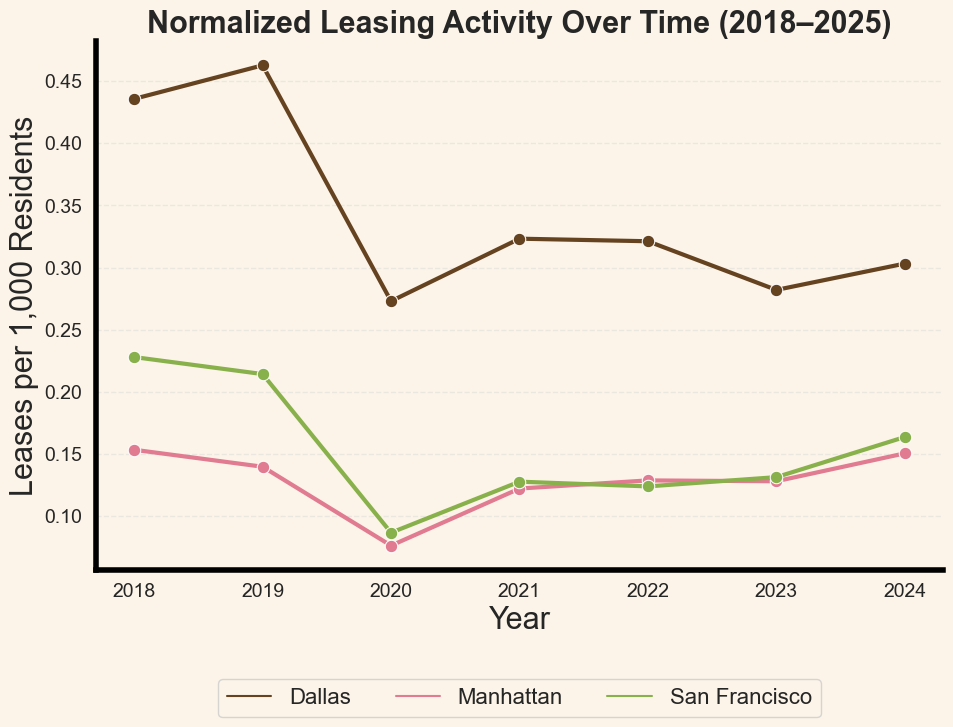

In [5]:
# --- 2. Normalized Leasing Activity over Time ---
lease_counts = leases_filtered.groupby(['year', 'city']).size().reset_index(name='lease_count')
merged = pd.merge(lease_counts, pop_melted, on=['year', 'city'])
merged['leases_per_1000'] = merged['lease_count'] / (merged['population'] / 1000)

fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=merged, x='year', y='leases_per_1000', hue='city', palette=colors, marker='o', linewidth=3, markersize=9, ax=ax)
ax.set_xlabel("Year", fontsize=22)
ax.set_ylabel("Leases per 1,000 Residents", fontsize=22)
ax.set_title("Normalized Leasing Activity Over Time (2018–2025)", fontsize=22, fontweight='bold')
ax.legend(title='', fontsize=16, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout(pad=2)
plt.savefig("leases_per_1000_residents_by_city.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


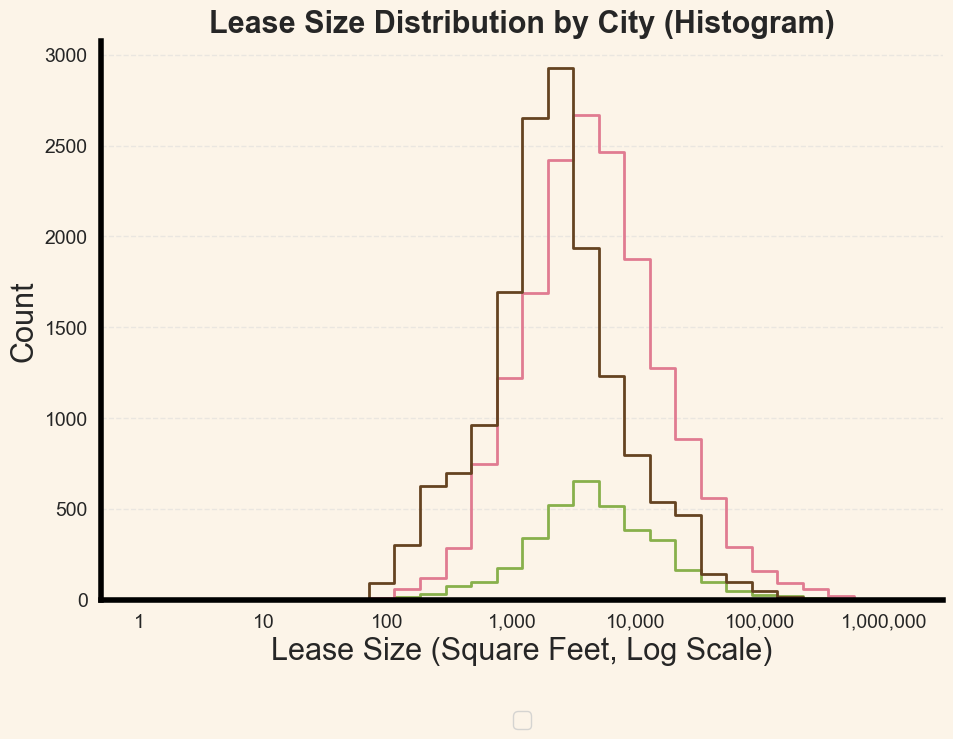

In [6]:
# --- 3. Histogram of Lease Sizes (Log Scale) ---
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(
    data=leases_filtered,
    x='leasedSF',
    hue='city',
    palette=colors,
    element='step',
    common_norm=False,
    log_scale=(True, False),
    bins=30,
    linewidth=2,
    fill=False,
    ax=ax
)
ax.set_xlabel("Lease Size (Square Feet, Log Scale)", fontsize=22)
ax.set_ylabel("Count", fontsize=22)
ax.set_title("Lease Size Distribution by City (Histogram)", fontsize=22, fontweight='bold')
ax.legend(title='', fontsize=16, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout(pad=2)
plt.savefig("lease_histogram_by_city_normalized.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()